# 0. Setup

Import packages and specify any important functions here.

In [2]:
# import standard python packages
import pandas as pd
import subprocess
import os
import dill
import sys
import datetime

# add the utils and env directories to the path
sys.path.append('../../utils/')
sys.path.append('../../env/')

# import functions from utils directory files
from string_functions import *
from biofile_handling import *

# import paths to software installs from env
from install_locs import *

# 1. Collect BioFileDockets for each starting dataset
Collects BioFileDockets for each of the species datasets in the `species_dict`.

This `dict` expects key:value pairs in the form of `species`:`conditions` and is passed to the MultiSpeciesBioFileDocket class, which creates a folder in `output/` for the analysis.

The folder name takes the following format:

- `species_concat` + `_` + `global_conditions` + `analysis_type`

Where `species_concat` is the string concatenation of the alphabetized list of species prefixes.

In [3]:
################
# general info #
################

species_dict = {
    'Danio_rerio': 'adultbrain',
    'Mus_musculus': 'adultbrain',
    'Xenopus_laevis': 'adultbrain'
}

global_conditions = 'adultbrain'

analysis_type = 'FoldSeek'

################

sample_MSD = MultiSpeciesBioFileDocket(
    species_dict = species_dict,
    global_conditions = global_conditions,
    analysis_type = analysis_type
    )

sample_MSD.get_BioFileDockets()
sample_MSD.s3_to_local()

/home/ec2-user/glial-origins/output/DrerMmusXlae_adultbrain_FoldSeek/ already exists
file GCF_000002035.5_GRCz10_genomic.gff already exists at /home/ec2-user/glial-origins/output/Drer_adultbrain/GCF_000002035.5_GRCz10_genomic.gff
file GCF_000002035.5_GRCz10_genomic.fna already exists at /home/ec2-user/glial-origins/output/Drer_adultbrain/GCF_000002035.5_GRCz10_genomic.fna
file GSM3768152_Brain_8_dge.txt already exists at /home/ec2-user/glial-origins/output/Drer_adultbrain/GSM3768152_Brain_8_dge.txt
file Drer_adultbrain_ZFIN_UniProtIDs.txt already exists at /home/ec2-user/glial-origins/output/Drer_adultbrain/Drer_adultbrain_ZFIN_UniProtIDs.txt
file Drer_adultbrain_uniprot-idmm.tsv already exists at /home/ec2-user/glial-origins/output/Drer_adultbrain/Drer_adultbrain_uniprot-idmm.tsv
file Drer_adultbrain_gtf-idmm.tsv already exists at /home/ec2-user/glial-origins/output/Drer_adultbrain/Drer_adultbrain_gtf-idmm.tsv
file GCF_000002035.5_GRCz10_genomic_cDNA.fna already exists at /home/ec2-us

# 2. Get gene list from UniProt using Taxid
Also, set the taxid for each species BioFileDocket.  

In [4]:
taxid_dict = {
    'Drer': 7955,
    'Mmus': 10090,
    'Xlae': 8355
}

for pre in sample_MSD.species_BioFileDockets:
    taxid = taxid_dict[pre]
    sample_MSD.species_BioFileDockets[pre].set_taxid(taxid)
    uniprot_genes = UniProtTaxidListFile(
        filename = pre + '_taxid_genes.txt',
        sampledict = sample_MSD.species_BioFileDockets[pre].sampledict,
        taxid = taxid_dict[pre]
    )
    sample_MSD.species_BioFileDockets[pre].add_keyfile('taxid_genes', uniprot_genes)
    
    display(pd.read_csv(sample_MSD.species_BioFileDockets[pre].taxid_genes.path, sep = '\t'))

overwriting taxid
key "taxid_genes" already exists, ignoring


,Entry,Organism (ID),Organism
0,A0A0D5W690,7955,Danio rerio (Zebrafish) (Brachydanio rerio)
1,A0A0G2KQY6,7955,Danio rerio (Zebrafish) (Brachydanio rerio)
2,A0A0G2KTI4,7955,Danio rerio (Zebrafish) (Brachydanio rerio)
3,A0A0G2KYH9,7955,Danio rerio (Zebrafish) (Brachydanio rerio)
4,A0A0G2L7I0,7955,Danio rerio (Zebrafish) (Brachydanio rerio)
...,...,...,...
52322,Z4YHP6,7955,Danio rerio (Zebrafish) (Brachydanio rerio)
52323,Z4YHQ6,7955,Danio rerio (Zebrafish) (Brachydanio rerio)
52324,Z4YHZ1,7955,Danio rerio (Zebrafish) (Brachydanio rerio)
52325,Z4YJ74,7955,Danio rerio (Zebrafish) (Brachydanio rerio)


overwriting taxid
key "taxid_genes" already exists, ignoring


,Entry,Organism (ID),Organism
0,A0A075F5C6,10090,Mus musculus (Mouse)
1,A0A087WPF7,10090,Mus musculus (Mouse)
2,A0A087WPU4,10090,Mus musculus (Mouse)
3,A0A087WRK1,10090,Mus musculus (Mouse)
4,A0A087WRT4,10090,Mus musculus (Mouse)
...,...,...,...
88529,Z4YN82,10090,Mus musculus (Mouse)
88530,Z4YN86,10090,Mus musculus (Mouse)
88531,Z4YN92,10090,Mus musculus (Mouse)
88532,Z4YN97,10090,Mus musculus (Mouse)


overwriting taxid
key "taxid_genes" already exists, ignoring


,Entry,Organism (ID),Organism
0,A0A191ZDL1,8355,Xenopus laevis (African clawed frog)
1,A0A1L8ETL3,8355,Xenopus laevis (African clawed frog)
2,A0A1L8F1P8,8355,Xenopus laevis (African clawed frog)
3,A0A1L8F5J9,8355,Xenopus laevis (African clawed frog)
4,A0A1L8FDW4,8355,Xenopus laevis (African clawed frog)
...,...,...,...
111802,W8W3R8,8355,Xenopus laevis (African clawed frog)
111803,X2FP34,8355,Xenopus laevis (African clawed frog)
111804,X5FKY5,8355,Xenopus laevis (African clawed frog)
111805,X5FX98,8355,Xenopus laevis (African clawed frog)


# 3. Download files from all species into a single directory
Use the taxids to query the AlphaFold-v4 database and download all .pdb files associated with that taxid.  

In [5]:
output_folder = sample_MSD.directory
alphafold_folder = output_folder + 'alphafold/'
if not os.path.exists(alphafold_folder):
    os.mkdir(alphafold_folder)

for pre in sample_MSD.species_BioFileDockets:
    taxid = sample_MSD.species_BioFileDockets[pre].metadata.taxid
    target_files = 'gs://public-datasets-deepmind-alphafold/proteomes/proteome-tax_id-' + taxid + '-*'
    
    checkpoint_filepath = output_folder + taxid + '.checkpoint'
    
    if not os.path.exists(checkpoint_filepath):
        subprocess.run(['gsutil', '-m', 'cp', target_files, output_folder])
        print('Download and untar for taxid', taxid, 'completed;\ncheckpoint file created at', checkpoint_filepath)
        
        filepaths = [output_folder + file for file in os.listdir(output_folder) if '.tar' in file]
        for file in filepaths:
            # Important to put all of the untar'd files into a separate folder
            # Otherwise filesystem stutters b/c too many files in a single directory
            subprocess.run(['tar', '-xf', file, '--directory', alphafold_folder])
        
        subprocess.run(['touch', checkpoint_filepath])
    else:
        print('Download and untar for taxid', taxid, 'has already been processed at', output_folder)

Download and untar for taxid 7955 has already been processed at /home/ec2-user/glial-origins/output/DrerMmusXlae_adultbrain_FoldSeek/
Download and untar for taxid 10090 has already been processed at /home/ec2-user/glial-origins/output/DrerMmusXlae_adultbrain_FoldSeek/
Download and untar for taxid 8355 has already been processed at /home/ec2-user/glial-origins/output/DrerMmusXlae_adultbrain_FoldSeek/


# 4. Run FoldSeek

Use a standard [FoldSeek clustering approach](https://github.com/steineggerlab/foldseek).  

In [6]:
db_folder = output_folder + 'all_foldomesDB'
foldseek_clustertsv = output_folder + 'clu_greedy.tsv'

if not os.path.exists(foldseek_clustertsv):

    subprocess.run(['foldseek', 'createdb', alphafold_folder, db_folder])

    foldseek_out = output_folder + 'all_by_all'
    foldseek_tmp = output_folder + 'tmp'
    subprocess.run(['foldseek', 'search', db_folder, db_folder, foldseek_out, foldseek_tmp, '-a'])

    foldseek_tmscore = output_folder + 'all_by_all_tmscore'
    subprocess.run(['foldseek', 'aln2tmscore', db_folder, db_folder, foldseek_out, foldseek_tmscore])

    foldseek_tsv = foldseek_tmscore + '.tsv'
    subprocess.run(['foldseek', 'createtsv', db_folder, db_folder, foldseek_tmscore, foldseek_tsv])
    
    foldseek_cluster = output_folder + 'clu'
    subprocess.run(['foldseek', 'clust', db_folder, foldseek_out, foldseek_cluster, '--cluster-mode', '0', '--similarity-type', '2'])
    
    subprocess.run(['foldseek', 'createtsv', db_folder, db_folder, foldseek_cluster, foldseek_clustertsv])

else:
    print('final cluster tsv file already found at', foldseek_clustertsv)

final cluster tsv file already found at /home/ec2-user/glial-origins/output/DrerMmusXlae_adultbrain_FoldSeek/clu_greedy.tsv


### Parse Output Data
Take FoldSeek output and reformat to have a shared structure to OrthoFinder results, where there are specified columns:
- one for the Structural cluster (StruCluster) IDs
- one each for the protein IDs from each species in that cluster.  

In [7]:
df = pd.read_csv(foldseek_clustertsv, sep = '\t', names = ['ClusterRep', 'uniprot_id'])
df['ClusterRep'] = df['ClusterRep'].str.split('-', expand = True)[1]
df['uniprot_id'] = df['uniprot_id'].str.split('-', expand = True)[1]

df_merged = df.groupby('ClusterRep').agg({i: ('first' if i == 'ClusterRep' else lambda x: [i for i in x]) for i in df.columns}).reset_index(drop = True)
df_merged.drop(columns = ['ClusterRep'], inplace = True)
df_merged.insert(0, 'StruCluster', 'SC' + df_merged.index.astype('str'))

for pre in taxid_dict:
    species_genes = pd.read_csv(sample_MSD.species_BioFileDockets[pre].taxid_genes.path, sep = '\t')
    species_genelist = set(species_genes['Entry'])
    df_merged[pre] = df_merged['uniprot_id'].apply(lambda x: ','.join(set(x).intersection(species_genelist)))

struclusters_df = df_merged.drop(columns = ['uniprot_id'])
struclusters_filename = '_'.join([sample_MSD.species_concat, sample_MSD.global_conditions, 'struclusters_file.tsv'])

struclusters_file = FoldSeekOutputFile(
    filename = struclusters_filename,
    species_dict = sample_MSD.species_dict,
    sampledict = sample_MSD.sampledict
)

struclusters_df.to_csv(struclusters_file.path, sep = '\t', index = None)

sample_MSD.add_keyfile('struclusters_file', struclusters_file)
display(struclusters_df)

,StruCluster,Drer,Mmus,Xlae
0,SC0,,"A0A023NE78,A0A4P2VRD2,B3Y998,A0A023NE65",
1,SC1,"Q4KMH7,E7EXY5,A0A2R8RMY7,A0A1D5NSW6,E7FGK1","B9EKL9,A0A3Q4EHV9,F8WJ93,D3Z4J9,A0A286YDN1,Q8V...","Q2TAF3,Q5U577,A0A1L8G1A2,A0A1L8GJX2"
2,SC2,,A0A024CD92,
3,SC3,,"A0A024CD39,A0A024CDU6,A0A024CEZ3",
4,SC4,,,A0A060CJT7
...,...,...,...,...
36646,SC36646,,Z4YN28,
36647,SC36647,,Z4YN31,
36648,SC36648,"A0A2R8PWB6,A5D8S0","Z4YN37,Q3UXL4","A1L2H3,A0A1L8G1N3"
36649,SC36649,,Z4YN77,


# 5. Generate Orthofinder_exc file from gxc file of each starting dataset

`gxc_to_exc()` converts the genes x cells matrix to a embeddings x cells matrix for each species in the dataset.

In [8]:
gxc_to_exc(sample_MSD = sample_MSD,
           embedding_df = struclusters_df, 
           exc_file = struclusters_file)

Using StruCluster embeddings as expected from FoldSeek
StruCluster_excfile already exists at /home/ec2-user/glial-origins/output/Drer_adultbrain/GSM3768152_Brain_8_dge_asStruCluster.txt skipping
key "StruCluster_exc" already exists, ignoring
StruCluster_excfile already exists at /home/ec2-user/glial-origins/output/Mmus_adultbrain/GSM2906405_Brain1_dge_coerced_asStruCluster.txt skipping
key "StruCluster_exc" already exists, ignoring
StruCluster_excfile already exists at /home/ec2-user/glial-origins/output/Xlae_adultbrain/GSM6214268_Xenopus_brain_COL65_dge_asStruCluster.txt skipping
key "StruCluster_exc" already exists, ignoring


# 6. Generate merged exc file for all samples in dataset

Collect the converted exc files and join them into one matrix for all species in the dataset, with all the cells from each species represented.

In [9]:
collector_df = pd.DataFrame()

export_filename = '_'.join([sample_MSD.species_concat, sample_MSD.global_conditions, 'asStruCluster', 'combined_exc.tsv'])

jointexc = JointExcFile(
    species_dict = sample_MSD.species_dict,
    sampledict = sample_MSD.sampledict,
    filename = export_filename,
    embedding = 'StruCluster',
    sources = [sample_MSD.species_BioFileDockets[pre].StruCluster_exc for pre in sample_MSD.species_BioFileDockets]
)

if not os.path.exists(jointexc.path):

    # Iterates through all of the species in the Species BioFileDocket
    for i, pre in enumerate(sample_MSD.species_BioFileDockets.keys()):
    
        df = pd.read_csv(sample_MSD.species_BioFileDockets[pre].StruCluster_exc.path, sep = '\t')
        df = df.add_prefix(pre + '_')
        df.rename(columns = {pre + '_' + 'StruCluster': 'StruCluster'}, inplace = True)
    
        if i == 0:
            collector_df = df
        else:
            collector_df = collector_df.merge(df, on = 'StruCluster', how = 'inner')

    collector_df.to_csv(jointexc.path, sep = '\t', index = None)

# Iterates through all of the species in the Species BioFileDocket
for pre in sample_MSD.species_BioFileDockets.keys():
    sample_MSD.species_BioFileDockets[pre].add_keyfile('StruCluster_jointexc', jointexc)

key "StruCluster_jointexc" already exists, ignoring
key "StruCluster_jointexc" already exists, ignoring
key "StruCluster_jointexc" already exists, ignoring


# 7. Pickle the species_BioFileDocket files

In [10]:
for pre in sample_MSD.species_BioFileDockets.keys():
    sample_MSD.species_BioFileDockets[pre].local_to_s3()
    sample_MSD.species_BioFileDockets[pre].pickle()
    sample_MSD.species_BioFileDockets[pre].push_to_s3(overwrite = True)

GCF_000002035.5_GRCz10_genomic.gff already exists in S3 bucket, skipping upload. set overwrite = True to overwrite the existing file.
GCF_000002035.5_GRCz10_genomic.fna already exists in S3 bucket, skipping upload. set overwrite = True to overwrite the existing file.
GSM3768152_Brain_8_dge.txt already exists in S3 bucket, skipping upload. set overwrite = True to overwrite the existing file.
Drer_adultbrain_ZFIN_UniProtIDs.txt already exists in S3 bucket, skipping upload. set overwrite = True to overwrite the existing file.
Drer_adultbrain_uniprot-idmm.tsv already exists in S3 bucket, skipping upload. set overwrite = True to overwrite the existing file.
Drer_adultbrain_gtf-idmm.tsv already exists in S3 bucket, skipping upload. set overwrite = True to overwrite the existing file.
GCF_000002035.5_GRCz10_genomic_cDNA.fna already exists in S3 bucket, skipping upload. set overwrite = True to overwrite the existing file.
GCF_000002035.5_GRCz10_genomic_cDNA.fna.transdecoder.bed already exists 

### Save
Saves the MultiSpeciesDocket to S3.

In [11]:
sample_MSD.pickle()
sample_MSD.push_to_s3(overwrite = True)

DrerMmusXlae_adultbrain_FoldSeek_MultiSpeciesBioFileDocket.pkl already exists in S3 bucket; overwriting.
upload: ../../output/DrerMmusXlae_adultbrain_FoldSeek/DrerMmusXlae_adultbrain_FoldSeek_MultiSpeciesBioFileDocket.pkl to s3://arcadia-reference-datasets/glial-origins-pkl/DrerMmusXlae_adultbrain_FoldSeek_MultiSpeciesBioFileDocket.pkl


# 8. Generate summary statistics

Parse the structural clusters file to determine the fraction of contribution of different species to structural clusters.  
Run the two cells below **together**.

In [39]:
og_df = pd.read_csv(sample_MSD.struclusters_file.path, sep = '\t', names = ['StruCluster', 'Mmus', 'Drer', 'Xlae'], skiprows = 1)

species_colordict = {'Drer': 'arcadia:aster',
                    'Mmus': 'arcadia:rose',
                    'Xlae': 'arcadia:seaweed'}

col_unpacker = lambda x: x.split(',') if type(x) == str else []

for col in species_colordict.keys():
    og_df[col] = og_df[col].apply(col_unpacker)
    og_df[col + '_size'] = og_df[col].apply(lambda x: len(x))

og_df['full_list'] = og_df['Mmus'] + og_df['Drer'] + og_df['Xlae']
og_df['size'] = og_df['full_list'].apply(lambda x: len(x))

for col in species_colordict.keys():
    og_df[col + '_fraction'] = og_df[col + '_size'] / og_df['size']

display(og_df)

,StruCluster,Mmus,Drer,Xlae,Drer_size,Mmus_size,Xlae_size,full_list,size,Drer_fraction,Mmus_fraction,Xlae_fraction
0,SC0,[],"[A0A023NE78, A0A4P2VRD2, B3Y998, A0A023NE65]",[],4,0,0,"[A0A023NE78, A0A4P2VRD2, B3Y998, A0A023NE65]",4,1.000000,0.000000,0.000000
1,SC1,"[Q4KMH7, E7EXY5, A0A2R8RMY7, A0A1D5NSW6, E7FGK1]","[B9EKL9, A0A3Q4EHV9, F8WJ93, D3Z4J9, A0A286YDN...","[Q2TAF3, Q5U577, A0A1L8G1A2, A0A1L8GJX2]",14,5,4,"[Q4KMH7, E7EXY5, A0A2R8RMY7, A0A1D5NSW6, E7FGK...",23,0.608696,0.217391,0.173913
2,SC2,[],[A0A024CD92],[],1,0,0,[A0A024CD92],1,1.000000,0.000000,0.000000
3,SC3,[],"[A0A024CD39, A0A024CDU6, A0A024CEZ3]",[],3,0,0,"[A0A024CD39, A0A024CDU6, A0A024CEZ3]",3,1.000000,0.000000,0.000000
4,SC4,[],[],[A0A060CJT7],0,0,1,[A0A060CJT7],1,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
36646,SC36646,[],[Z4YN28],[],1,0,0,[Z4YN28],1,1.000000,0.000000,0.000000
36647,SC36647,[],[Z4YN31],[],1,0,0,[Z4YN31],1,1.000000,0.000000,0.000000
36648,SC36648,"[A0A2R8PWB6, A5D8S0]","[Z4YN37, Q3UXL4]","[A1L2H3, A0A1L8G1N3]",2,2,2,"[A0A2R8PWB6, A5D8S0, Z4YN37, Q3UXL4, A1L2H3, A...",6,0.333333,0.333333,0.333333
36649,SC36649,[],[Z4YN77],[],1,0,0,[Z4YN77],1,1.000000,0.000000,0.000000


### Make a summary plot of StruCluster size and distribution for all StruClusters
- This analysis includes all of the clusters, including ones that only contain genes from 1 or 2 species.

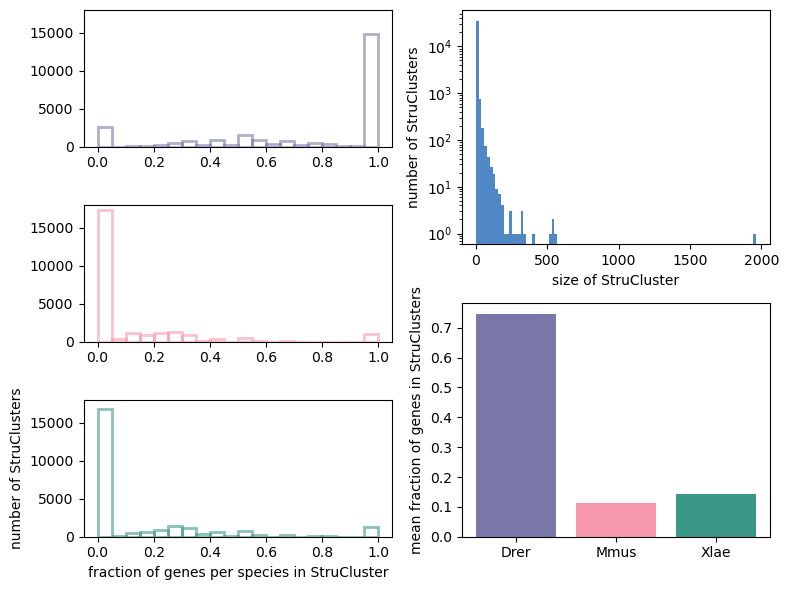

In [40]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import arcadia_pycolor as apc
import numpy as np
from matplotlib.gridspec import GridSpec

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=apc.arcadia_All_ordered.values())
mpl.rcParams['pdf.fonttype'] = 42


fig = plt.figure(figsize = (8, 6))
gs = GridSpec(6, 2, figure = fig)

fig.add_subplot(gs[0:3, 1])
plt.hist(og_df['size'].values, bins = 100, color = 'arcadia:aegean', rasterized = True)
plt.yscale('log')
plt.ylabel('number of StruClusters')
plt.xlabel('size of StruCluster')

i = 0
for key, value in species_colordict.items():
    fig.add_subplot(gs[i:i+2, 0])
    plt.hist(og_df[key + '_fraction'].values, bins = np.arange(0, 1.05, 0.05), edgecolor = value, fill = False, alpha = 0.6, linewidth = 2)
    plt.ylim(0, 18000)
    i += 2
plt.xlabel('fraction of genes per species in StruCluster')
plt.ylabel('number of StruClusters')

mean_fraction = [np.mean(og_df[x + '_fraction'].dropna().values) for x in species_colordict.keys()]
fig.add_subplot(gs[3:, 1])
plt.bar(list(species_colordict.keys()), mean_fraction, color = list(species_colordict.values()))
plt.ylabel('mean fraction of genes in StruClusters')

plt.tight_layout()
plt.savefig('DrerMmusXlae_SC_stats_ALL.pdf', dpi = 300)
plt.show()

### Generate summary statistics for all-species StruClusters.

- This analysis includes only the StruClusters that include at least one gene from all three species.

Parse the structural clusters file to determine the fraction of contribution of different species to structural clusters.  
Run the two cells below **together**.

In [41]:
og_exclusive_df = pd.read_csv(sample_MSD.struclusters_file.path, sep = '\t', names = ['StruCluster', 'Mmus', 'Drer', 'Xlae'], skiprows = 1)
og_exclusive_df.dropna(inplace = True)

og_df = og_exclusive_df

species_colordict = {'Drer': 'arcadia:aster',
                    'Mmus': 'arcadia:rose',
                    'Xlae': 'arcadia:seaweed'}

col_unpacker = lambda x: x.split(',') if type(x) == str else []

for col in species_colordict.keys():
    og_df[col] = og_df[col].apply(col_unpacker)
    og_df[col + '_size'] = og_df[col].apply(lambda x: len(x))

og_df['full_list'] = og_df['Mmus'] + og_df['Drer'] + og_df['Xlae']
og_df['size'] = og_df['full_list'].apply(lambda x: len(x))

for col in species_colordict.keys():
    og_df[col + '_fraction'] = og_df[col + '_size'] / og_df['size']

display(og_df)

,StruCluster,Mmus,Drer,Xlae,Drer_size,Mmus_size,Xlae_size,full_list,size,Drer_fraction,Mmus_fraction,Xlae_fraction
1,SC1,"[Q4KMH7, E7EXY5, A0A2R8RMY7, A0A1D5NSW6, E7FGK1]","[B9EKL9, A0A3Q4EHV9, F8WJ93, D3Z4J9, A0A286YDN...","[Q2TAF3, Q5U577, A0A1L8G1A2, A0A1L8GJX2]",14,5,4,"[Q4KMH7, E7EXY5, A0A2R8RMY7, A0A1D5NSW6, E7FGK...",23,0.608696,0.217391,0.173913
6,SC6,[Q567X9],"[Q3UV16, B2RPW2, Q3TB59, A2ASA8, Q5NCS9, Q3TNL8]","[A0A1L8EYS7, Q569T9, A0A060CNQ1, A0A1L8FDN8, A...",6,1,11,"[Q567X9, Q3UV16, B2RPW2, Q3TB59, A2ASA8, Q5NCS...",18,0.333333,0.055556,0.611111
9,SC9,"[F1Q8R5, A4IG61]","[Q8BGV8, A0A2U3TZF4]","[A0A060CUX1, A0A060CPC9]",2,2,2,"[F1Q8R5, A4IG61, Q8BGV8, A0A2U3TZF4, A0A060CUX...",6,0.333333,0.333333,0.333333
13,SC13,"[Q6B3P0, F1R480, Q2MLR9, B0V236, A0A2R8QPF5, A...","[Q3TJ23, P70407, Q8QZT6, Q925M4, I6L9J1, A0A0A...","[B5DE46, F8V3X7, A0A1L8FSX6, A0A067XPX5, A0A1L...",112,24,38,"[Q6B3P0, F1R480, Q2MLR9, B0V236, A0A2R8QPF5, A...",174,0.643678,0.137931,0.218391
14,SC14,[Q6DGM9],"[Q9Z1P6, A0A068BGR9]","[A0A1L8HWL5, A0A1L8HNB7]",2,1,2,"[Q6DGM9, Q9Z1P6, A0A068BGR9, A0A1L8HWL5, A0A1L...",5,0.400000,0.200000,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...
36611,SC36611,"[A8E4S7, Q6NYB4, E7FBQ4, E7F782, Q8UUZ1, B8JLG8]","[Q8CEZ4, O70299, Q8BPP1, D3Z742, Q8CI17, Q8C52...","[A0A310TPJ3, A0A1L8G3G1, Q9I9K2, A0A1L8HUE0, A...",7,6,9,"[A8E4S7, Q6NYB4, E7FBQ4, E7F782, Q8UUZ1, B8JLG...",22,0.318182,0.272727,0.409091
36621,SC36621,"[Q7ZVV0, A0A2R8RT44, F1QCQ8]","[Q5SUD9, Q9DBF3, Q3U0J2, Q9JI70, Z4YKQ3]",[A5PKN5],5,3,1,"[Q7ZVV0, A0A2R8RT44, F1QCQ8, Q5SUD9, Q9DBF3, Q...",9,0.555556,0.333333,0.111111
36623,SC36623,"[Q3KRG3, Q8JGT2]","[Z4YL87, H7BWY8, Q8C8T8]","[Q4V7Z5, Q3KPN2]",3,2,2,"[Q3KRG3, Q8JGT2, Z4YL87, H7BWY8, Q8C8T8, Q4V7Z...",7,0.428571,0.285714,0.285714
36632,SC36632,[Q6DBY0],"[Q8R480, Z4YM95, Z4YLV0]",[Q68FJ0],3,1,1,"[Q6DBY0, Q8R480, Z4YM95, Z4YLV0, Q68FJ0]",5,0.600000,0.200000,0.200000


### Make plots

Ditto the above set of plots, but this time for only StruClusters containing genes from all three species.  
This is the plot that is the basis for the figure in the pub.

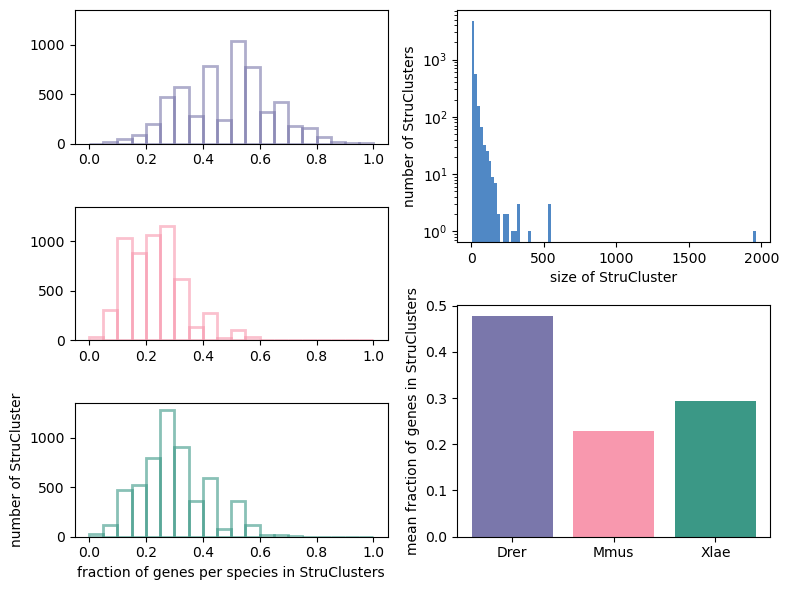

In [42]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import arcadia_pycolor as apc
import numpy as np
from matplotlib.gridspec import GridSpec

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=apc.arcadia_All_ordered.values())
mpl.rcParams['pdf.fonttype'] = 42


fig = plt.figure(figsize = (8, 6))
gs = GridSpec(6, 2, figure = fig)

fig.add_subplot(gs[0:3, 1])
plt.hist(og_df['size'].values, bins = 100, color = 'arcadia:aegean', rasterized = True)
plt.yscale('log')
plt.ylabel('number of StruClusters')
plt.xlabel('size of StruCluster')

i = 0
for key, value in species_colordict.items():
    fig.add_subplot(gs[i:i+2, 0])
    plt.hist(og_df[key + '_fraction'].values, bins = np.arange(0, 1.05, 0.05), edgecolor = value, fill = False, alpha = 0.6, linewidth = 2)
    plt.ylim(0, 1350)
    i += 2
plt.xlabel('fraction of genes per species in StruClusters')
plt.ylabel('number of StruCluster')

mean_fraction = [np.mean(og_df[x + '_fraction'].values) for x in species_colordict.keys()]
fig.add_subplot(gs[3:, 1])
plt.bar(list(species_colordict.keys()), mean_fraction, color = list(species_colordict.values()))
plt.ylabel('mean fraction of genes in StruClusters')

plt.tight_layout()
plt.savefig('DrerMmusXlae_SC_stats.pdf', dpi = 300)
plt.show()

### Display mean fraction for each species from bar chart

Drer, Mmus, Xlae

In [43]:
display(mean_fraction)

[0.47762948596700844, 0.22878436412801417, 0.2935861499049774]